# Naive Bayes Classification
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=ed8f7950-eee4-4c58-897f-1e01c57abaa2)

- Algorithmus, um Daten zu klassifizieren, also in vorgegebene Gruppen einzuteilen.
- Naive Bayes Modelle sind sehr (sehr!) schnell und recht einfach.
- Eignen sich gut für sehr hochdimensionale Daten.
- (Fast) keine Hyperparameter, daher gut geeigent als einfaches **Baseline-Modell**
- Ein Baseline-Modell ist ein einfaches Modell, das ohne viel Aufwand erzeugt werden kann. Dessen Performance wird dann als Mindeststandard herangezogen, um komplexere Modelle einzuschätzen bzw. deren Performance einzuordnen.

Bei Bayes Klassifikation geht es darum, die **Wahrscheinlichkeit eines Labels** (also einer Klasse) vorherzusagen **unter der Voraussetzung, dass gewisse Features** beobachtet wurden. *Beispiel: Es liegen die Daten von 25 Sensoren einer Produktionseinheit vor. Wie wahrscheinlich ist es, dass im letzten Batch zu viel Ausschuss produziert wurde?*

## Grundlage: Bedingte Wahrscheinlichkeiten und der Satz von Bayes
Unter $P(A|B)$ versteht man die Wahrscheinlichkeit, dass Ereignis $A$ eintritt, **unter der Voraussetzung, dass Ereignis $B$ bereits eingetreten ist.** Das nennt man *bedingte Wahrscheinlichkeit* (des Ereignisses $A$ unter der Bedingung, dass $B$ eingetreten ist). Es gilt:

$$ P(A~|~B) = \frac{P(A\cap B)}{P(B)} = \frac{\frac{P(A\cap B)}{P(A)}P(A)}{P(B)}
 = \frac{P(B~|~A)\, P(A)}{P(B)}$$

Damit lässt sich also die Wahrscheinlichkeit von

$A$ unter der Bedingung, dass $B$ eingetreten ist

ausdrücken/berechnen durch die Wahrscheinlichkeit von

$B$ unter der Voraussetzung, dass $A$ eingetreten ist.

Eine sehr gute, intuitive, visuelle Erklärung/Vertiefung des Satz von Bayes finden Sie z.B. im [YouTube Channel von 3Blue1Brown](https://www.youtube.com/watch?v=HZGCoVF3YvM).

## Anwendung auf Klassifikation
Das ist sehr nützlich für unsere Klassifizierungsaufgabe: Für ein konkretes Sample werden die Features beobachtet. Die Frage ist, in welche Kategorie dieses Sample basierend darauf eingeordnet werden sollte, d.h. welches Label zugewiesen werden soll.

Der Grundgedanke hinter Bayes Klassifikation ist nun der, dass diejenige Kategorie ausgewählt werden sollte, die aufgrund der beobachteten Features **die wahrscheinlichste** ist. Es soll also dasjenige Label $L$ gewählt werden, für welches $P(L~|~\text{features})$ am größten ist. Diese Wahrscheinlichkeit kann mit Hilfe des Satzes von Bayes aus Größen berechnet werden, die besser zugänglich sind:
$$P(L~|~\text{features}) = \frac{P(\text{features}~|~L)\, P(L)}{P(\text{features})}$$

Um also zwischen zwei Labels $L_1$ und $L_2$ zu entscheiden, wird das Verhältnis
$$ \frac{P(L_1~|~\text{features})}{P(L_2~|~\text{features})} = 
\frac{P(\text{features}~|~L_1)}{P(\text{features}~|~L_2)} \frac{P(L_1)}{P(L_2)}$$
betrachtet. Somit muss die Wahrscheinlichkeit dafür berechnet werden, dass gewisse Features beobachtet werden, falls ein gewisses Label $L_i$ vorliegt, also $P(\text{features}~|~L_i)$.

Hierfür braucht man ein Modell, ein sog. *generatives Modell* (da es eine Wahrscheinlichkeitsverteilung generiert). Die Erzeugung/Berechnung dieses Modells (für jedes Label) ist die Hauptaufgabe des Trainings eines Bayes Classifiers. Das ist i.A. sehr kompliziert, kann aber durch (einfache) Annahmen vereinfacht werden. Die zentrale "naive Annahme" bei Naive Bayes ist, dass für ein gegebenes Label die Features *unabhängig* voneinander sind.

Wir treffen also eine naive Annahme über das generative Modell für jedes Label und erhalten damit eine (grobe?) Approximation der (unbekannten) wahren Wahrscheinlichkeitsverteilung der Features für ein festes Label. Somit können die o.g. Wahrscheinlichkeiten berechnet werden und wir können die Klassifikation durchführen ("wähle dasjenige Label, welches am wahrscheinlichsten ist").
 
Da es im Detail unterschiedliche naive Annahmen gibt, gibt es auch unterschiedliche *Naive* Bayes Classifier.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes

**Naive Annahme:** Für jedes einzelne Label sind die Daten (d.h. die Features) gemäß einer **Gauß'schen Normalverteilung** verteilt.

Beispielhaft betrachten wir folgende Daten:

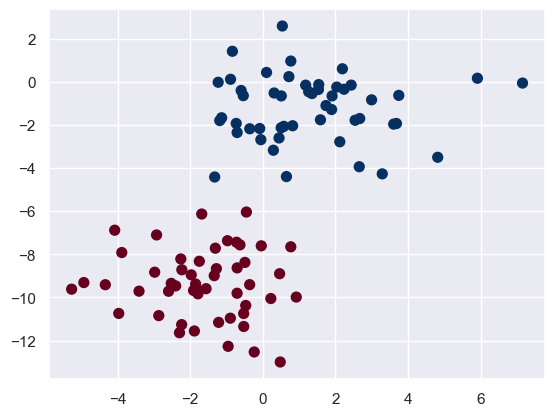

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

**Naive Annahme:** Zu jedem einzelnen Label sind die Daten normalverteilt. D.h. konkret:
- die blauen Punkte sind normalverteilt
- die roten Punkte sind normalverteilt

Diese Annahme ist sehr einfach, da die Normalverteilung nur zwei Parameter hat:
- Erwartungswert $\mu$
- Standardabweichung $\sigma$

Diese beiden Parameter können aber aus den Daten einfach berechnet werden:
- Der Erwartungswert ist der Mittelwert der gegebenen Punkte eines Labels.
- Die Standardabweichung ist die Standardabweichung der gegebenen Punkte eines Labels.

Konkret: Für die Wahrscheinlichkeit, dass ein blauer Punkt die Koordinaten $(x,y)$ hat, gilt:
$$P(x,y) = \frac{1}{\sqrt{2\pi\sigma^2} } \exp\left({-\frac{\left\|\begin{pmatrix} x\\  y\end{pmatrix}-
\begin{pmatrix}\mu_x\\ \mu_y \end{pmatrix} \right\|^2}{2\sigma^2}} \right)
$$
Dabei bezeichnen $\mu_x$ und $\mu_y$ die $x$- bzw. $y$- Koordinaten des Erwartungswerts (der blauen Punkte).

Zur Erinnerung: So sieht die Dichtefunktion der Gauß'schen Normalverteilung aus:

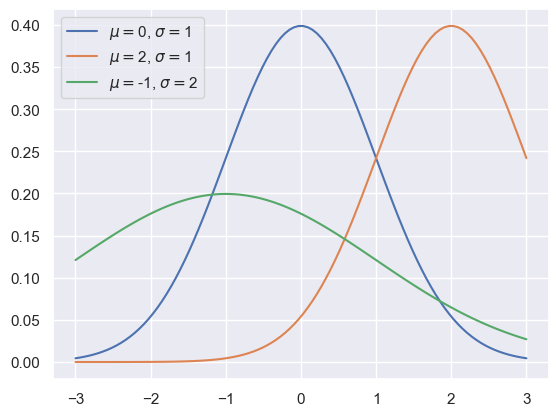

In [3]:
def gaussian(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi*np.power(sigma,2.)))*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

x_values = np.linspace(-3, 3, 100)
for mu, sigma in [(0,1),(2,1),(-1,2)]:
    plt.plot(x_values, gaussian(x_values, mu, sigma), label="$\mu=${0}, $\sigma=${1}".format(mu, sigma))
    plt.legend()

plt.show()

In zwei Dimensionen und mit den vorliegenden Daten ergeben sich folgende Bilder:

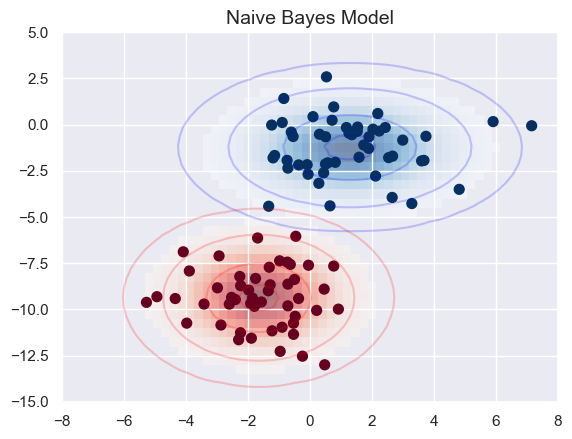

In [4]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim);

Die eingezeichneten Ellipsen visualisieren das generative Modell für jedes einzelne Label; die Wahrscheinlichkeit wird zum Mittelpunkt der Ellipse größer. Mit diesem generativen Modell kann für einen gegebenen Punkt berechnet werden, wie "wahrscheinlich er ist, falls ein festes Label vorliegt". Durch den Satz von Bayes kann damit die interessante Wahrscheinlichkeit berechnet werden, dass ein *gegebener Punkt* ein gewisses *Label hat.*

Damit ist auch klar, welches Label (im Beispiel rot oder blau) für einen gegebenen Punkt das wahrscheinlichere ist. Damit kann der Punkt klassifiziert werden. Zusätzlich bekommt auch eine Aussage, wie "sicher" sich das Modell ist, dass der Punkt so zu klassifizieren ist.

### Verfügbarkeit in ``sklearn``

Gaussian Naive Bayes ist in der Klasse ``GaussianNB`` verfügbar. Wir trainieren ein Modell auf den obigen Daten:

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Nun generieren wir zufällige Punkte und nutzen das Modell, um deren Label vorherzusagen:

In [6]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Die grafische Darstellung gibt einen Eindruck in die "Grenze" der Kategorisierung.

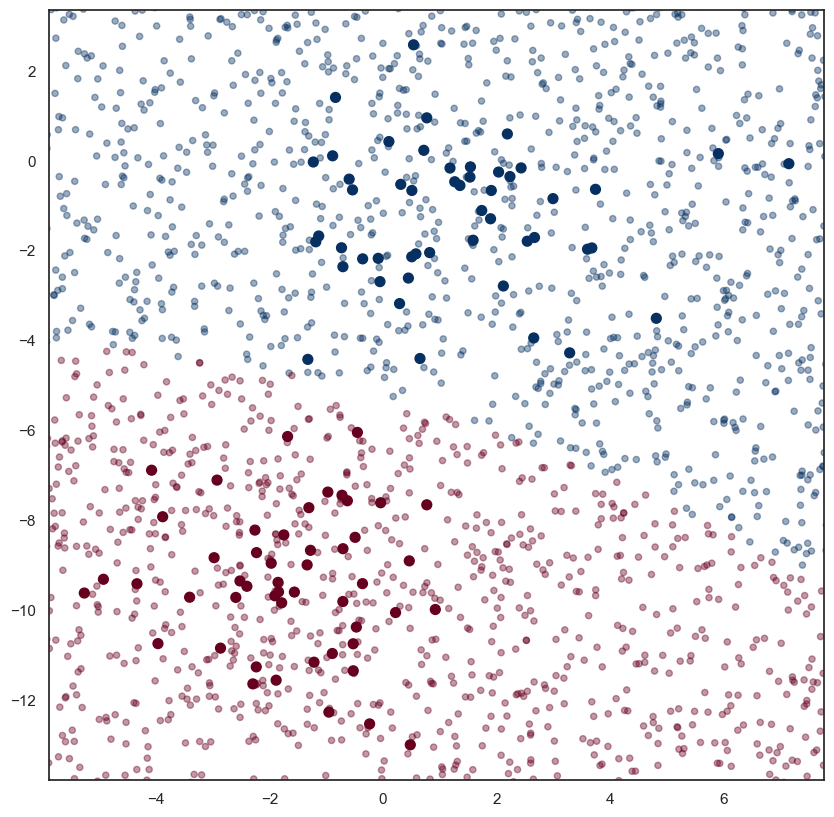

In [7]:
sns.set_style('white')
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.4)
plt.axis(lim);
sns.set();

Die Grenze zwischen dem roten und blauen Bereich sieht etwas gekrümmt aus; im Allgemeinen ist diese bei Gaussian Naive Bayes parabelförmig.

Obiger Plot ist entstanden, indem jeder Punkt entsprechend seines (vom Modell bestimmten) Labels rot oder blau gefärbt wurde. Die entsprechende Info wurde vom Modell im ``predict``-Schritt berechnet und von uns im Vektor ``ynew`` gespeichert.

In [8]:
ynew

array([1, 1, 1, ..., 0, 1, 1])

Dieser enthält nur Nullen und Einsen, d.h. die Info, welche Kategorie gewählt wurde. Allerdings stellen Bayes-Klassifizierer auch noch die Information bereit, *wie wahrscheinlich* das jeweilige Label ist. Hierfür gibt es die Methode ``predict_proba``:

In [9]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2) # Zeige die ersten 8 Einträge und runde diese auf zwei Nachkommastellen

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [10]:
model.predict_proba([[-0.2,-5]])

array([[0.33967735, 0.66032265]])

Wie gut oder schlecht solche Modelle sind, hängt im Wesentlichen davon ab, wie realistisch die gemachte naive Annahme ist. Im Allgemeinen werden solche Klassifizierer daher weniger gut performen als komplexere Modelle.

Besonders gut eignen sie sich
- wenn die naive Annahme gut zu den Daten passt (eher selten der Fall)
- wenn die einzelnen Kategorien gut getrennt sind (und daher kein komplexes Modell nötig ist)
- **wenn die Daten sehr hochdimensional sind**

Zum letzten Punkt: es ist unwahrscheinlich, dass hochdimensionale Daten schlecht separiert sind, denn damit Punkte nahe beieinander liegen, müssen *alle* Komponenten ähnlich sein — das ist unwahrscheinlich, wenn es sehr viele Kompoennten gibt. Daher sind einfache Modelle bei sehr hochdimensionalen Daten häufig recht gut.

## Multinomial Naive Bayes
Hier verwenden wir anstelle der obigen "Normalverteilungsannahme" eine andere naive Annahme: Die Daten sind gemäß der Multinomialverteilung (auch "Polynomialverteilung", "kategorische Verteilung", "Multinulli") verteilt.

*Grob gesprochen: Ein Würfel hat eine rote, zwei blaue und drei grüne Seiten. Man würfelt 100 mal. Wie wahrscheinlich ist es 30 mal rot, 50 mal blau und 20 mal grün zu würfeln?*

Die Multinomialverteilung beschreibt die Wahrscheinlichkeit, dass jede Kategorie eine bestimmte Anzahl oft vorkommt. Damit eignet sie sich vor allem für Features, die eine Zählung darstellen.

### Beispiel: Klassifizierung von Texten
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=2706e1ac-13cb-4d84-ae53-d0825d029a19)

Bei der Klassifizierung von Texten zählt man häufig, wie oft bestimmte Wörter im Text enthalten sind.

Zuerst sollten wir betrachten, wie man mit Daten umgeht, die nicht nur aus Zahlen bestehen... siehe 03.03 Feature Engineering.

Den dort eingeführten TF-IDF-Vectorizer verwenden wir nun um einen Datensatz, der aus ca. 20000 Newsgroup Posts besteht, zu vektorisieren. Wir laden die Daten:

In [11]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

Für mehr Übersichtlichkeit verwenden wir nur die Kategorien 'talk.religion.misc', 'soc.religion.christian', 'sci.space' und 'comp.graphics'. Wir laden die entsprechenden Trainings- und Testdaten:

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print(train.data[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [ ]:
print(train.data[2])

From: mccall@mksol.dseg.ti.com (fred j mccall 575-3539)
Subject: Re: nuclear waste
Organization: Texas Instruments Inc
Lines: 34

In <1psg95$ree@access.digex.net> prb@access.digex.com (Pat) writes:

[On the issue of 'burning' nuclear wastes using particle beams...]

>How is it ever going to be an Off- the Shelf Technology if someone doesn't
>do it?  Maybe we should do this as part of the SSF design goals. ;-)

>Gee fred.  After your bitter defense of 20 KHz power as a Basic technology
>for SSF, Id think you would support a minor research program like
>this.

I sometimes wonder if your newsfeed gives you different articles than
everyone else, Pat.  Just a *few* corrections:

1) I never 'defended' 20kHz power, other than as something reasonable
to GO LOOK AT.

2) I have also never opposed a *research project* into feasibility of
the spalling reactor approach to 'cleaning' nuclear waste -- I simply
doubt it could be made to work in the Real World (tm), which ought to
become clear fairly q

Nun sollen zwei Sachen passieren:

1.   Die Daten sollen vektorisiert werden (also in eine numerische Features-Matrix umgewandelt werden).
2.   Multinomial Naive Bayes soll verwendet werden, um die Daten zu kategorisieren.

Diese beiden Schritte fassen wir in eine Pipeline zusammen:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Das Modell wurde nun trainiert und auf die Testdaten angewendet. Wir wollen sehen, wie gut es diese kategorisiert hat. Dazu betrachten wir die ``confusion_matrix`` (diese hatten wir schon verwendet in 2.5 Erkennen handschriftlicher Zahlen): 

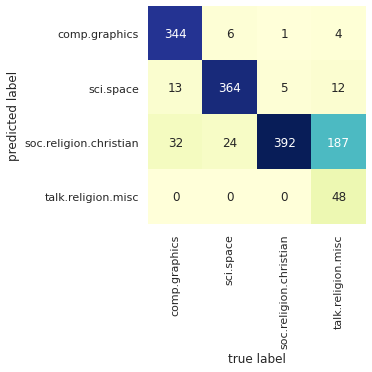

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu", cbar=False, 
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Da wir nun ein trainiertes Modell haben, können wir dies zur Klassifizierung beliebiger Texte (in obige Kategorien) verwenden:

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('launching a satellite')

'sci.space'